In [12]:
import pandas as pd
from IPython.display import Image
import matplotlib.pyplot as plt
import altair as alt
from vega_datasets import data

%matplotlib inline
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

pd.set_option('display.float_format', lambda x: '%.3f' % x)

alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

## Definitions

**Research ODA definition:** "Official Development Assistance (ODA) is the term used by Development Assistance Committee (DAC) members to refer to what most people would call aid. To be counted as ODA, public money must be given outright or loaned on concessional (non-commercial) terms, and be used to support the welfare or development of developing countries." (Source FAQ page, more details on [definition & coverage](https://www.oecd.org/dac/financing-sustainable-development/development-finance-standards/officialdevelopmentassistancedefinitionandcoverage.htm))

**OECD ODA recipients** The DAC List of ODA Recipients shows all countries and territories eligible to receive official development assistance (ODA). These consist of all low and middle income countries based on gross national income (GNI) per capita as published by the World Bank, with the exception of G8 members, EU members, and countries with a firm date for entry into the EU. The list also includes all of the Least Developed Countries (LDCs) as defined by the United Nations (UN). The DAC revises the list every three years. Countries that have exceeded the high-income threshold for three consecutive years at the time of the review are removed. (...) The next review of the DAC List will take place in 2023. ([Source](https://www.oecd.org/dac/financing-sustainable-development/development-finance-standards/daclist.htm))

**DAC** Development Assistance Committee 

**Bilateral aid** represents flows from official (government) sources directly to official sources in the recipient country.

**Multilateral aid** represents core contributions from official (government) sources to multilateral agencies where it is then used to fund the multilateral agencies’ own programmes.

In some cases, a donor can contract with a multilateral agency to deliver a programme or project on its behalf in a recipient country. Such cases are typically counted as bilateral flows and are often referred to as Bi/Multi.

**Official donors** DAC + Non-DAC + multilateral; excludes private donors which according to OECD *should* be excluded

## Conversion 
### between constant USD 2017 (Chinese data) und current prices million USD (OECD data)

* **Current prices to constant ones** *The following table shows the annual rates of the Consumer Price Index. To convert current dollars of any year to constant dollars, divide them by the index of that year and multiply them by the index of the base year you choose (remember that the numerator contains the index value of the year you want to move to). For example, using this index, `$10,000 in 1997 would be 12,622 in 2008 constant dollars ($10,000 × 114.1/  90.4 = $12,622)`.* Source: [Canadian Statistics Office](https://www150.statcan.gc.ca/n1/pub/75f0011x/2011001/notes/analytical-analytiques-eng.htm)
    * is the Consumer Price Index different for each country or is there a global one?


* ***Current dollars** is a term describing income in the year in which a person, household, or family receives it. For example, the income someone received in 1989 unadjusted for inflation is in current dollars.**Constant or real dollars** are terms describing income after adjustment for inflation. The Dictionary of Business and Economics defines constant dollar values and real income as shown below.* Source: [US Census Bureau](https://www.census.gov/topics/income-poverty/income/guidance/current-vs-constant-dollars.html)

# Checks

## In 2020, are there African countries *not* eligible for ODA?

In [13]:
eligible_countries = pd.read_csv('../data/OECD-ODA-eligible-country-2020.csv')

eligible_countries.head()

,ODA_eligible_country,iso3code,numericISOcode,eligibility
0,Afghanistan,AFG,4.000,yes
1,Democratic Peoples Republic of Korea,PRK,408.000,yes
2,Armenia,ARM,51.000,yes
3,Albania,ALB,8.000,yes
4,Angola,AGO,24.000,yes


In [14]:
countries = alt.topo_feature(data.world_110m.url, "countries")
countries

UrlData({
  format: TopoDataFormat({
    feature: 'countries',
    type: 'topojson'
  }),
  url: 'https://cdn.jsdelivr.net/npm/vega-datasets@v1.29.0/data/world-110m.json'
})

In [15]:
import altair as alt
from vega_datasets import data

countries = alt.topo_feature(data.world_110m.url, "countries")

projection_type="naturalEarth1"
scale_value=240
center_values=[25,10]

base = alt.Chart(countries).mark_geoshape(
    fill='#D8DDE2',
    stroke='white'
).properties(
    width=1200,
    height=800,
).project(
    type=projection_type,
    center=center_values,
    scale=scale_value
)

chart = alt.Chart(countries).mark_geoshape().encode(
    alt.Color('eligibility:N', type ='ordinal', scale=alt.Scale(domain=['yes'],range=["#00A5FF"])),
    tooltip=["ODA_eligible_country:N", 'eligibility:N']
).transform_lookup(
    lookup="id",
    from_=alt.LookupData(eligible_countries,'numericISOcode',['ODA_eligible_country','eligibility'])
).project(
    type=projection_type,
    center=center_values,
    scale=scale_value
).properties(
    width=1200,
    height=800,
    title='Countries eligible for ODA in 2020'
)

eligble_map = base + chart
eligble_map

alt.LayerChart(...)

# DATA INSPECTION

In [16]:
df = pd.DataFrame()

for year in range(2002,2020,1):
    filename = '../data/ODA-yearly/ODA-'+str(year)+'-DAC2a.csv'
    df_temp = pd.read_csv(filename)
    df_temp['year'] = year
    df = pd.concat([df, df_temp])

df = df.drop('FakeColumn', axis=1)
df.head()

,Recipient,"Official Donors, Total","DAC Countries, Total","Non-DAC Countries, Total","Multilateral Agencies, Total","Private Donors, Total",Australia,Austria,Belgium,Canada,Czech Republic,Denmark,Finland,France,Germany,Greece,Hungary,Iceland,Ireland,Italy,Japan,Korea,Luxembourg,Netherlands,New Zealand,Norway,Poland,Portugal,Slovak Republic,Slovenia,Spain,Sweden,Switzerland,United Kingdom,United States,EU Institutions,Azerbaijan,Bulgaria,Croatia,Cyprus,Estonia,Israel,Kazakhstan,Kuwait,Latvia,Liechtenstein,Lithuania,Malta,Qatar,Romania,Russia,Saudi Arabia,Chinese Taipei,Thailand,Timor-Leste,Turkey,United Arab Emirates,Other donor countries,"International Monetary Fund, Total",IMF (Concessional Trust Funds),"Regional Development Banks, Total","African Development Bank, Total",African Development Bank [AfDB],African Development Fund [AfDF],"Asian Development Bank, Total",Asian Development Bank [AsDB],"Inter-American Development Bank, Total",Inter-American Development Bank [IDB],Asian Infrastructure Investment Bank [AIIB],Caribbean Development Bank [CarDB],Council of Europe Development Bank [CEB],European Bank for Reconstruction and Development [EBRD],Islamic Development Bank [IsDB],"United Nations, Total",Food and Agriculture Organisation [FAO],International Atomic Energy Agency [IAEA],IFAD,International Labour Organisation [ILO],UNAIDS,UNDP,UNECE,UNEP,UNFPA,UNHCR,UNICEF,UN Institute for Disarmament Research [UNIDIR],UN Peacebuilding Fund [UNPBF],UNRWA,UNTA,WFP,World Health Organisation [WHO],World Tourism Organisation [UNWTO],"World Bank Group, Total","World Bank, Total",International Bank for Reconstruction and Development [IBRD],International Development Association [IDA],International Finance Corporation [IFC],"Other Multilateral, Total",Adaptation Fund,Arab Bank for Economic Development in Africa [BADEA],Arab Fund (AFESD),Center of Excellence in Finance [CEF],Central Emergency Response Fund [CERF],Climate Investment Funds [CIF],Global Alliance for Vaccines and Immunization [GAVI],Global Environment Facility [GEF],Global Fund,Global Green Growth Institute [GGGI],Green Climate Fund [GCF],Montreal Protocol,Nordic Development Fund [NDF],OPEC Fund for International Development [OPEC Fund],OSCE,Other Multilaterals,Arcadia Fund,Arcus Foundation,BBVA Microfinance Foundation,Bernard van Leer Foundation,Bill & Melinda Gates Foundation,Carnegie Corporation of New York,Charity Projects Ltd (Comic Relief),Children's Investment Fund Foundation,Citi Foundation,Conrad N. Hilton Foundation,David & Lucile Packard Foundation,Ford Foundation,Gatsby Charitable Foundation,Gordon and Betty Moore Foundation,Grameen Crédit Agricole Foundation,H&M Foundation,IKEA Foundation,Jacobs Foundation,John D. & Catherine T. MacArthur Foundation,La Caixa Banking Foundation,Laudes Foundation,LEGO Foundation,Margaret A. Cargill Foundation,MasterCard Foundation,MAVA Foundation,McKnight Foundation,MetLife Foundation,Michael & Susan Dell Foundation,Oak Foundation,"Omidyar Network Fund, Inc.",Rockefeller Foundation,Wellcome Trust,William & Flora Hewlett Foundation,World Diabetes Foundation,Dutch Postcode Lottery,Norwegian Postcode Lottery,People's Postcode Lottery,Swedish Postcode Lottery,"G7 Countries, Total","DAC-EU Countries, Total","United Postcode Lotteries, Total",year,Donor(s),Unnamed: 0
0,All Recipients,NaN,58654.230,3264.430,17112.800,NaN,988.740,520.130,1071.510,2004.280,45.430,1643.240,462.200,5486.170,5324.410,276.170,NaN,12.650,397.780,2332.130,9282.950,278.750,146.760,3338.020,121.820,1696.090,14.260,322.580,6.680,NaN,1712.300,2011.060,938.890,4929.160,13290.070,5448.120,NaN,NaN,NaN,NaN,1.250,130.890,NaN,20.380,1.500,NaN,1.640,NaN,NaN,NaN,NaN,2477.750,NaN,NaN,NaN,72.960,558.060,NaN,901.620,901.620,876.150,714.560,99.040,615.520,NaN,NaN,NaN,NaN,NaN,62.800,NaN,43.900,54.890,3142.650,NaN,NaN,148.470,NaN,NaN,274.680,NaN,NaN,310.170,633.490,566.870,NaN,NaN,392.200,466.160,350.610,NaN,NaN,6163.420,6163.420,NaN,6163.420,NaN,580.840,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [17]:
df_melted = df.melt(id_vars=['Recipient','year'])
df_melted.head()

,Recipient,year,variable,value
0,All Recipients,2002,"Official Donors, Total",NaN
1,"All Developing Countries, Total",2002,"Official Donors, Total",60966.210
2,"All Multilateral Recipients, Total",2002,"Official Donors, Total",18065.250
3,"Africa, Total",2002,"Official Donors, Total",21368.300
4,"North of Sahara, Total",2002,"Official Donors, Total",2106.580


In [18]:
df_melted[(df_melted['Recipient']=='Afghanistan')&(df_melted['variable']=='Germany')]

,Recipient,year,variable,value
64390,Afghanistan,2002,Germany,92.570
64665,Afghanistan,2003,Germany,82.100
64940,Afghanistan,2004,Germany,9.610
65215,Afghanistan,2005,Germany,17.280
65490,Afghanistan,2006,Germany,10.910
65765,Afghanistan,2007,Germany,17.250
66040,Afghanistan,2008,Germany,10.130
66315,Afghanistan,2009,Germany,17.970
66865,Afghanistan,2011,Germany,539.300
67140,Afghanistan,2012,Germany,515.540


In [19]:
supp1 = pd.read_csv('../data/ODA-supplementary-donortype.csv')
supp1.head()

,donor,donor_type
0,"Official Donors, Total",summary
1,"DAC Countries, Total",summary
2,"Non-DAC Countries, Total",summary
3,"Multilateral Agencies, Total",summary
4,"Private Donors, Total",summary


In [20]:
df_melted = df_melted.merge(supp1, left_on='variable', right_on='donor')
df_melted.head()

,Recipient,year,variable,value,donor,donor_type
0,All Recipients,2002,"Official Donors, Total",NaN,"Official Donors, Total",summary
1,"All Developing Countries, Total",2002,"Official Donors, Total",60966.210,"Official Donors, Total",summary
2,"All Multilateral Recipients, Total",2002,"Official Donors, Total",18065.250,"Official Donors, Total",summary
3,"Africa, Total",2002,"Official Donors, Total",21368.300,"Official Donors, Total",summary
4,"North of Sahara, Total",2002,"Official Donors, Total",2106.580,"Official Donors, Total",summary


In [21]:
df_melted = df_melted[['Recipient', 'year','value', 'donor', 'donor_type']]
df_melted.columns= (['Recipient', 'year','currentPrices_Million_USD', 'donor', 'donor_type'])

In [22]:
df_melted.head()

,Recipient,year,currentPrices_Million_USD,donor,donor_type
0,All Recipients,2002,NaN,"Official Donors, Total",summary
1,"All Developing Countries, Total",2002,60966.210,"Official Donors, Total",summary
2,"All Multilateral Recipients, Total",2002,18065.250,"Official Donors, Total",summary
3,"Africa, Total",2002,21368.300,"Official Donors, Total",summary
4,"North of Sahara, Total",2002,2106.580,"Official Donors, Total",summary


In [23]:
overview_developingCountries = df_melted[(df_melted['donor_type']=='summary')&(df_melted['donor']=='Official Donors, Total')&(df_melted['Recipient']=='All Developing Countries, Total')]
overview_developingCountries

,Recipient,year,currentPrices_Million_USD,donor,donor_type
1,"All Developing Countries, Total",2002,60966.210,"Official Donors, Total",summary
276,"All Developing Countries, Total",2003,70525.190,"Official Donors, Total",summary
551,"All Developing Countries, Total",2004,54785.710,"Official Donors, Total",summary
826,"All Developing Countries, Total",2005,83112.970,"Official Donors, Total",summary
1101,"All Developing Countries, Total",2006,77622.450,"Official Donors, Total",summary
1376,"All Developing Countries, Total",2007,73734.610,"Official Donors, Total",summary
1651,"All Developing Countries, Total",2008,87128.240,"Official Donors, Total",summary
1926,"All Developing Countries, Total",2009,83968.370,"Official Donors, Total",summary
2476,"All Developing Countries, Total",2011,139449.770,"Official Donors, Total",summary
2751,"All Developing Countries, Total",2012,133751.600,"Official Donors, Total",summary


In [24]:
overview_africa = df_melted[(df_melted['donor_type']=='summary')&(df_melted['donor']=='Official Donors, Total')&(df_melted['Recipient']=='Africa, Total')]

In [25]:
overview_ssa_africa = df_melted[(df_melted['donor_type']=='summary')&(df_melted['donor']=='Official Donors, Total')&(df_melted['Recipient']=='South of Sahara, Total')]

In [26]:
all_devC=alt.Chart(overview_developingCountries).mark_bar(color='#6D7780').encode(
    x='year:N',
    y='currentPrices_Million_USD:Q'
)

african_c=alt.Chart(overview_africa).mark_bar(color='#002D5A').encode(
    x='year:N',
    y='currentPrices_Million_USD:Q'
)

ssa_c = alt.Chart(overview_ssa_africa).mark_bar(color='#00A5FF').encode(
    x='year:N',
    y='currentPrices_Million_USD:Q'
)

layered = alt.layer(all_devC, african_c, ssa_c)

layered.properties(width = 300)

alt.LayerChart(...)

In [27]:
df_melted['donor_type'].value_counts()

bilateral       257400
private         198000
multilateral    133650
subgroup        133650
summary          34650
Name: donor_type, dtype: int64

In [28]:
df_melted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 757350 entries, 0 to 757349
Data columns (total 5 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   Recipient                  715275 non-null  object
 1   year                       757350 non-null  int64 
 2   currentPrices_Million_USD  203751 non-null  object
 3   donor                      757350 non-null  object
 4   donor_type                 757350 non-null  object
dtypes: int64(1), object(4)
memory usage: 34.7+ MB


In [29]:
donor_types = df_melted.groupby(by='donor_type')['currentPrices_Million_USD'].sum().reset_index()

In [30]:
donor_types=donor_types.drop(index = 3)

In [31]:
donor_types

,donor_type,currentPrices_Million_USD
0,bilateral,15703295.850
1,multilateral,3189056.010
2,private,16194914.710
4,summary,31871263.640


In [32]:
sum_money_OECD_donors = donor_types['currentPrices_Million_USD'].sum()

In [33]:
donor_types['share_donorType'] = [donor_money / sum_money_OECD_donors for donor_money in donor_types['currentPrices_Million_USD']]

In [34]:
donor_types

,donor_type,currentPrices_Million_USD,share_donorType
0,bilateral,15703295.850,0.235
1,multilateral,3189056.010,0.048
2,private,16194914.710,0.242
4,summary,31871263.640,0.476


In [35]:
alt.Chart(donor_types).mark_bar(height = 100).encode(
    alt.X('sum(currentPrices_Million_USD):Q',stack='normalize'),
    color='donor_type:N'
).properties(
    height=100
)

alt.Chart(...)

## Chinese data

In [36]:
cf = pd.read_csv('../data/AidData_excerpt_aggregates_all_years.csv', delimiter=';')
cf.head()

,\AidData TUFF Project ID,Recommended For Aggregates,Umbrella,Financier Country,Recipient,Recipient Region,Commitment Year,Title,Status,Intent,Flow Type,Concessional,Flow Class,Sector Code,Sector Name,Funding Agencies,Funding Agencies Type,Amount (Original Currency),Original Currency,Amount (Constant USD2017),Amount (Nominal)
0,53631,Yes,No,China (People's Republic of),Afghanistan,Asia,2017,China provides humanitarian aid to Afghanistan...,Completion,Development,Grant,Yes,ODA-like,720,EMERGENCY RESPONSE,Unspecified Chinese Government Institution,Government Agency,137100000.000,AFN,2015410.812,2015410.812
1,53632,Yes,No,China (People's Republic of),Afghanistan,Asia,2017,China donates equipment to Kabul University,Completion,Development,Grant,Yes,ODA-like,110,EDUCATION,Unspecified Chinese Government Institution,Government Agency,NaN,NaN,NaN,NaN
2,53633,Yes,No,China (People's Republic of),Afghanistan,Asia,2017,China donates $1 million USD to UNHCR for huma...,Completion,Development,Grant,Yes,ODA-like,720,EMERGENCY RESPONSE,Unspecified Chinese Government Institution,Government Agency,1000000.000,USD,1000000.000,1000000.000
3,53634,Yes,No,China (People's Republic of),Afghanistan,Asia,2017,Chinese Government provides RMB 180 million gr...,Completion,Development,Grant,Yes,ODA-like,110,EDUCATION,China Ministry of Commerce,Government Agency,18000000.000,CNY,2663728.108,2663728.108
4,53636,Yes,No,China (People's Republic of),Afghanistan,Asia,2017,China donates desks and chairs to China-Afghan...,Completion,Representational,Grant,Yes,OOF-like,110,EDUCATION,Chinese Embassy,Government Agency,NaN,NaN,NaN,NaN


In [37]:
cf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10849 entries, 0 to 10848
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   \AidData TUFF Project ID    10849 non-null  int64  
 1   Recommended For Aggregates  10849 non-null  object 
 2   Umbrella                    10849 non-null  object 
 3   Financier Country           10849 non-null  object 
 4   Recipient                   10849 non-null  object 
 5   Recipient Region            10849 non-null  object 
 6   Commitment Year             10849 non-null  int64  
 7   Title                       10849 non-null  object 
 8   Status                      10849 non-null  object 
 9   Intent                      10849 non-null  object 
 10  Flow Type                   10849 non-null  object 
 11  Concessional                10849 non-null  object 
 12  Flow Class                  10849 non-null  object 
 13  Sector Code                 108

### Chinese financying by flow type

In [38]:
cf['Flow Class'].value_counts()

ODA-like                    7567
OOF-like                    2781
Vague (Official Finance)     501
Name: Flow Class, dtype: int64

In [39]:
cf.groupby(by='Flow Class')['Amount (Constant USD2017)'].sum()

Flow Class
ODA-like                   100558302427.056
OOF-like                   681961752028.526
Vague (Official Finance)    60373239964.850
Name: Amount (Constant USD2017), dtype: float64

In [40]:
cf_flowTypes = cf.groupby(by='Flow Class')['Amount (Constant USD2017)'].sum().reset_index()

In [41]:
cf_flowTypes_sum = cf_flowTypes['Amount (Constant USD2017)'].sum()

In [42]:
cf_flowTypes['share_pct_flowType'] = [flow_type_amount / cf_flowTypes_sum for flow_type_amount in cf_flowTypes['Amount (Constant USD2017)'] ]

In [43]:
cf_flowTypes

,Flow Class,Amount (Constant USD2017),share_pct_flowType
0,ODA-like,100558302427.056,0.119
1,OOF-like,681961752028.526,0.809
2,Vague (Official Finance),60373239964.850,0.072


In [44]:
alt.Chart(cf_flowTypes).mark_bar(width=250).encode(
    alt.Y('sum(Amount (Constant USD2017)):Q', stack='normalize'),
    color='Flow Class:N'

).properties(width=600)

alt.Chart(...)

### Apply OECD ODA-eligibility to Chinese data

In [45]:
eligible_countries.head()

,ODA_eligible_country,iso3code,numericISOcode,eligibility
0,Afghanistan,AFG,4.000,yes
1,Democratic Peoples Republic of Korea,PRK,408.000,yes
2,Armenia,ARM,51.000,yes
3,Albania,ALB,8.000,yes
4,Angola,AGO,24.000,yes


In [46]:
countrycodesAidData = pd.read_csv('../data/country-and-continent-codes-list-forAidData.csv', delimiter=';')

In [47]:
cfm = cf.merge(countrycodesAidData[['country','ISO3code']], left_on='Recipient', right_on='country')

In [48]:
cfm.head()

,\AidData TUFF Project ID,Recommended For Aggregates,Umbrella,Financier Country,Recipient,Recipient Region,Commitment Year,Title,Status,Intent,Flow Type,Concessional,Flow Class,Sector Code,Sector Name,Funding Agencies,Funding Agencies Type,Amount (Original Currency),Original Currency,Amount (Constant USD2017),Amount (Nominal),country,ISO3code
0,53631,Yes,No,China (People's Republic of),Afghanistan,Asia,2017,China provides humanitarian aid to Afghanistan...,Completion,Development,Grant,Yes,ODA-like,720,EMERGENCY RESPONSE,Unspecified Chinese Government Institution,Government Agency,137100000.000,AFN,2015410.812,2015410.812,Afghanistan,AFG
1,53632,Yes,No,China (People's Republic of),Afghanistan,Asia,2017,China donates equipment to Kabul University,Completion,Development,Grant,Yes,ODA-like,110,EDUCATION,Unspecified Chinese Government Institution,Government Agency,NaN,NaN,NaN,NaN,Afghanistan,AFG
2,53633,Yes,No,China (People's Republic of),Afghanistan,Asia,2017,China donates $1 million USD to UNHCR for huma...,Completion,Development,Grant,Yes,ODA-like,720,EMERGENCY RESPONSE,Unspecified Chinese Government Institution,Government Agency,1000000.000,USD,1000000.000,1000000.000,Afghanistan,AFG
3,53634,Yes,No,China (People's Republic of),Afghanistan,Asia,2017,Chinese Government provides RMB 180 million gr...,Completion,Development,Grant,Yes,ODA-like,110,EDUCATION,China Ministry of Commerce,Government Agency,18000000.000,CNY,2663728.108,2663728.108,Afghanistan,AFG
4,53636,Yes,No,China (People's Republic of),Afghanistan,Asia,2017,China donates desks and chairs to China-Afghan...,Completion,Representational,Grant,Yes,OOF-like,110,EDUCATION,Chinese Embassy,Government Agency,NaN,NaN,NaN,NaN,Afghanistan,AFG


In [49]:
cfmm = cfm.merge(eligible_countries, left_on='ISO3code',right_on='iso3code')

In [50]:
len(cfmm)

9842

In [51]:
cfmm.head()

,\AidData TUFF Project ID,Recommended For Aggregates,Umbrella,Financier Country,Recipient,Recipient Region,Commitment Year,Title,Status,Intent,Flow Type,Concessional,Flow Class,Sector Code,Sector Name,Funding Agencies,Funding Agencies Type,Amount (Original Currency),Original Currency,Amount (Constant USD2017),Amount (Nominal),country,ISO3code,ODA_eligible_country,iso3code,numericISOcode,eligibility
0,53631,Yes,No,China (People's Republic of),Afghanistan,Asia,2017,China provides humanitarian aid to Afghanistan...,Completion,Development,Grant,Yes,ODA-like,720,EMERGENCY RESPONSE,Unspecified Chinese Government Institution,Government Agency,137100000.000,AFN,2015410.812,2015410.812,Afghanistan,AFG,Afghanistan,AFG,4.000,yes
1,53632,Yes,No,China (People's Republic of),Afghanistan,Asia,2017,China donates equipment to Kabul University,Completion,Development,Grant,Yes,ODA-like,110,EDUCATION,Unspecified Chinese Government Institution,Government Agency,NaN,NaN,NaN,NaN,Afghanistan,AFG,Afghanistan,AFG,4.000,yes
2,53633,Yes,No,China (People's Republic of),Afghanistan,Asia,2017,China donates $1 million USD to UNHCR for huma...,Completion,Development,Grant,Yes,ODA-like,720,EMERGENCY RESPONSE,Unspecified Chinese Government Institution,Government Agency,1000000.000,USD,1000000.000,1000000.000,Afghanistan,AFG,Afghanistan,AFG,4.000,yes
3,53634,Yes,No,China (People's Republic of),Afghanistan,Asia,2017,Chinese Government provides RMB 180 million gr...,Completion,Development,Grant,Yes,ODA-like,110,EDUCATION,China Ministry of Commerce,Government Agency,18000000.000,CNY,2663728.108,2663728.108,Afghanistan,AFG,Afghanistan,AFG,4.000,yes
4,53636,Yes,No,China (People's Republic of),Afghanistan,Asia,2017,China donates desks and chairs to China-Afghan...,Completion,Representational,Grant,Yes,OOF-like,110,EDUCATION,Chinese Embassy,Government Agency,NaN,NaN,NaN,NaN,Afghanistan,AFG,Afghanistan,AFG,4.000,yes


In [52]:
cf_odaEligible = cfmm[cfmm['eligibility']=='yes']

In [53]:
len(cf_odaEligible)

9842

In [54]:
pd.set_option('display.max_rows', 300)
cf_odaEligible.groupby(by='Recipient')['Amount (Constant USD2017)'].sum()

Recipient
Afghanistan                          438802551.055
Albania                              110166074.994
Algeria                              212506868.260
Angola                             52732338555.584
Antigua and Barbuda                  369940056.620
Argentina                           8755779896.748
Armenia                               90324933.646
Azerbaijan                           580756483.476
Bangladesh                          9823816986.807
Belarus                             8253167756.048
Benin                               1135892944.589
Bolivia                             2103149414.054
Bosnia and Herzegovina              1535859734.136
Botswana                            1311003650.113
Brazil                             41450785420.608
Burundi                              410323646.314
Cabo Verde                           372044171.017
Cambodia                           10036325794.359
Cameroon                            5797362705.691
Central African Repub

In [55]:
### Overview Chinese data: spendings on OECD-eligible countries
overview_allC = cf_odaEligible.groupby(by='Commitment Year')['Amount (Constant USD2017)'].sum().reset_index()
overview_allC

,Commitment Year,Amount (Constant USD2017)
0,2000,3205761836.642
1,2001,7813582729.247
2,2002,5225700232.343
3,2003,7527949871.589
4,2004,4626484615.196
5,2005,14562811058.785
6,2006,18175902128.332
7,2007,27950109198.147
8,2008,27212898607.131
9,2009,62098536476.480


In [56]:
overview_allC_africa = cf_odaEligible[cf_odaEligible['Recipient Region']=='Africa'].groupby(by='Commitment Year')['Amount (Constant USD2017)'].sum().reset_index()
overview_allC_africa

,Commitment Year,Amount (Constant USD2017)
0,2000,1171611760.884
1,2001,2565435002.551
2,2002,2179983844.978
3,2003,3661659922.895
4,2004,2198915603.430
5,2005,6783773816.935
6,2006,9629307838.341
7,2007,12270039362.425
8,2008,8150423655.803
9,2009,12315060762.916


In [57]:
overview_allC_ODA= cf_odaEligible[cf_odaEligible['Flow Class']=='ODA-like'].groupby(by='Commitment Year')['Amount (Constant USD2017)'].sum().reset_index()
overview_allC_OOF= cf_odaEligible[cf_odaEligible['Flow Class']=='OOF-like'].groupby(by='Commitment Year')['Amount (Constant USD2017)'].sum().reset_index()


In [58]:
Chinese_all_devC=alt.Chart(overview_allC).mark_bar(color='#6D7780').encode(
    x='Commitment Year:N',
    y='Amount (Constant USD2017)'
)
Chinese_oof_africa=alt.Chart(overview_allC_OOF).mark_bar(color='#002D5A').encode(
    x='Commitment Year:N',
    y='Amount (Constant USD2017)'
)
Chinese_oda_africa=alt.Chart(overview_allC_ODA).mark_bar(color='#00A5FF').encode(
    x='Commitment Year:N',
    y='Amount (Constant USD2017)'
)

layered_chinese = alt.layer(Chinese_all_devC,  Chinese_oof_africa, Chinese_oda_africa)

layered_chinese.properties(width = 300)

alt.LayerChart(...)

### Unify unit: convert current prices to constant ones

In [59]:
# currentPrices_Million_USD_year * (CPI2017 / CPP_year)
# https://www.census.gov/topics/income-poverty/income/guidance/current-vs-constant-dollars.html
cpi_2017 = 361.0
cpi_2020 = 381.2
cpis = [{'year':2000, 'cpi':252.9},{'year':2001, 'cpi':260.1},{'year':2002, 'cpi':264.2},{'year':2003, 'cpi':270.2},{'year':2004, 'cpi':277.5},{'year':2005, 'cpi':286.9},{'year':2006, 'cpi':296.2},{'year':2007, 'cpi':304.6},{'year':2008, 'cpi':316.3},{'year':2009, 'cpi':315.2},{'year':2010, 'cpi':320.4},{'year':2011, 'cpi':330.5},{'year':2012, 'cpi':337.5},{'year':2013, 'cpi':342.5},{'year':2014, 'cpi':348.3},{'year': 2013, 'cpi': 342.5},{'year': 2014, 'cpi': 348.3},{'year': 2015, 'cpi': 348.9}, {'year': 2016, 'cpi': 353.4},{'year': 2017, 'cpi': 361.0}, {'year': 2018, 'cpi': 369.8}, {'year': 2019, 'cpi': 376.5}, {'year':2020, 'cpi': 381.2}]

cpidf = pd.DataFrame(cpis)
cpidf

,year,cpi
0,2000,252.900
1,2001,260.100
2,2002,264.200
3,2003,270.200
4,2004,277.500
5,2005,286.900
6,2006,296.200
7,2007,304.600
8,2008,316.300
9,2009,315.200


### Filter to include bilateraland multilateral donors

In [60]:
selection = df_melted[(df_melted['donor_type']=='bilateral')|(df_melted['donor_type']=='multilateral')]

In [61]:
df_melted_constant = pd.DataFrame()

for year in range(2002,2020,1):
    df_melted_temp = selection[selection['year']==year]
    cpi_year = cpidf[cpidf['year']==year]['cpi'].iloc[0]
    df_melted_temp['constant2020_million_USD'] = df_melted_temp['currentPrices_Million_USD'] * (cpi_2020/cpi_year)
    df_melted_constant= pd.concat([df_melted_constant,df_melted_temp])

/var/folders/fk/_qbrt9ys18b6s2yb_kqblv1xt9_xg3/T/ipykernel_13909/2694187356.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_melted_temp['constant2020_million_USD'] = df_melted_temp['currentPrices_Million_USD'] * (cpi_2020/cpi_year)


In [62]:
df_melted_constant

,Recipient,year,currentPrices_Million_USD,donor,donor_type,constant2020_million_USD
24750,All Recipients,2002,988.740,Australia,bilateral,1426.600
24751,"All Developing Countries, Total",2002,773.670,Australia,bilateral,1116.287
24752,"All Multilateral Recipients, Total",2002,215.070,Australia,bilateral,310.313
24753,"Africa, Total",2002,28.980,Australia,bilateral,41.814
24754,"North of Sahara, Total",2002,3.260,Australia,bilateral,4.704
...,...,...,...,...,...,...
559345,UNHCR,2019,NaN,Other Multilaterals,multilateral,NaN
559346,UNICEF,2019,NaN,Other Multilaterals,multilateral,NaN
559347,UNRWA,2019,NaN,Other Multilaterals,multilateral,NaN
559348,WFP,2019,NaN,Other Multilaterals,multilateral,NaN


### make sum of each dataset

In [63]:
df_seventeen_year_sum = pd.DataFrame()

for recipient in df_melted_constant['Recipient'].unique():# for every recipient
    df_temp = df_melted_constant[df_melted_constant['Recipient']==recipient]
    df_temp2 = df_temp.groupby(by='donor')['constant2020_million_USD'].sum().reset_index() # group by donor # make average
    df_temp2['recipient'] = recipient 
    df_seventeen_year_sum = pd.concat([df_seventeen_year_sum, df_temp2])

In [64]:
df_seventeen_year_sum.columns=(['donor', 'amount_constant2020_million_USD', 'recipient'])

df_seventeen_year_sum.head()

,donor,amount_constant2020_million_USD,recipient
0,Adaptation Fund,963.715,All Recipients
1,"African Development Bank, Total",24589.833,All Recipients
2,Arab Bank for Economic Development in Africa [...,1423.089,All Recipients
3,Arab Fund (AFESD),2111.575,All Recipients
4,"Asian Development Bank, Total",10077.809,All Recipients


### Same with Chineses data

In [65]:
cf_odaEligible.head()

,\AidData TUFF Project ID,Recommended For Aggregates,Umbrella,Financier Country,Recipient,Recipient Region,Commitment Year,Title,Status,Intent,Flow Type,Concessional,Flow Class,Sector Code,Sector Name,Funding Agencies,Funding Agencies Type,Amount (Original Currency),Original Currency,Amount (Constant USD2017),Amount (Nominal),country,ISO3code,ODA_eligible_country,iso3code,numericISOcode,eligibility
0,53631,Yes,No,China (People's Republic of),Afghanistan,Asia,2017,China provides humanitarian aid to Afghanistan...,Completion,Development,Grant,Yes,ODA-like,720,EMERGENCY RESPONSE,Unspecified Chinese Government Institution,Government Agency,137100000.000,AFN,2015410.812,2015410.812,Afghanistan,AFG,Afghanistan,AFG,4.000,yes
1,53632,Yes,No,China (People's Republic of),Afghanistan,Asia,2017,China donates equipment to Kabul University,Completion,Development,Grant,Yes,ODA-like,110,EDUCATION,Unspecified Chinese Government Institution,Government Agency,NaN,NaN,NaN,NaN,Afghanistan,AFG,Afghanistan,AFG,4.000,yes
2,53633,Yes,No,China (People's Republic of),Afghanistan,Asia,2017,China donates $1 million USD to UNHCR for huma...,Completion,Development,Grant,Yes,ODA-like,720,EMERGENCY RESPONSE,Unspecified Chinese Government Institution,Government Agency,1000000.000,USD,1000000.000,1000000.000,Afghanistan,AFG,Afghanistan,AFG,4.000,yes
3,53634,Yes,No,China (People's Republic of),Afghanistan,Asia,2017,Chinese Government provides RMB 180 million gr...,Completion,Development,Grant,Yes,ODA-like,110,EDUCATION,China Ministry of Commerce,Government Agency,18000000.000,CNY,2663728.108,2663728.108,Afghanistan,AFG,Afghanistan,AFG,4.000,yes
4,53636,Yes,No,China (People's Republic of),Afghanistan,Asia,2017,China donates desks and chairs to China-Afghan...,Completion,Representational,Grant,Yes,OOF-like,110,EDUCATION,Chinese Embassy,Government Agency,NaN,NaN,NaN,NaN,Afghanistan,AFG,Afghanistan,AFG,4.000,yes


## Filter for ODA-like data

In [66]:
selection_cf = cf_odaEligible[cf_odaEligible['Flow Class']=='ODA-like']

In [67]:
cf_grouped = selection_cf.groupby(by=['Recipient', 'Commitment Year'])['Amount (Constant USD2017)'].sum().reset_index()
cf_grouped

,Recipient,Commitment Year,Amount (Constant USD2017)
0,Afghanistan,2000,1113800.692
1,Afghanistan,2001,2446247.143
2,Afghanistan,2002,15609533.866
3,Afghanistan,2003,14994850.208
4,Afghanistan,2004,63438647.712
...,...,...,...
1545,Zimbabwe,2013,26553751.923
1546,Zimbabwe,2014,221055701.856
1547,Zimbabwe,2015,22904189.937
1548,Zimbabwe,2016,29804740.570


### rework cf data from Constant USD2017 to Constant USD2020

In [68]:
# currentPrice_year = constant price / (cpi_2017 /cpy_year) 
# constant price 2020 = currentPrice_year * (cpi_2020 /cpy_year)

In [69]:
cf_grouped_constant = pd.DataFrame()

for year in range(2000,2018,1):
    cf_grouped_temp = cf_grouped[cf_grouped['Commitment Year']==year]
    cpi_year = cpidf[cpidf['year']==year]['cpi'].iloc[0]
    cf_grouped_temp['constant2020_million_USD'] = cf_grouped_temp['Amount (Constant USD2017)'] * (cpi_2020 / cpi_2017) / 1000000
    #cf_grouped_temp['constant2020_million_USD'] = cf_grouped_temp['currentPrices_Million_USD'] * (cpi_2020/cpi_year)
    #Amount(Constant USD2017) * (CPI-U-RS 2020 / CPI-U-RS 2017)
    cf_grouped_constant= pd.concat([cf_grouped_constant,cf_grouped_temp])

/var/folders/fk/_qbrt9ys18b6s2yb_kqblv1xt9_xg3/T/ipykernel_13909/2938452563.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cf_grouped_temp['constant2020_million_USD'] = cf_grouped_temp['Amount (Constant USD2017)'] * (cpi_2020 / cpi_2017) / 1000000


In [70]:
cf_grouped_constant.head()

,Recipient,Commitment Year,Amount (Constant USD2017),constant2020_million_USD
0,Afghanistan,2000,1113800.692,1.176
18,Albania,2000,2673121.661,2.823
30,Algeria,2000,0.000,0.000
45,Angola,2000,0.000,0.000
96,Bangladesh,2000,145215208.830,153.341


In [71]:
cf_seventeen_year_sum_list = []

for recipient in cf_grouped_constant['Recipient'].unique():
    cf_temp = {}
    cf_temp['amount_constant2020_million_USD'] = cf_grouped_constant[cf_grouped_constant['Recipient']==recipient]['constant2020_million_USD'].sum() / 1000000
    cf_temp['donor']='China'
    cf_temp['recipient']=recipient
    cf_seventeen_year_sum_list.append(cf_temp)

cf_seventeen_year_sum = pd.DataFrame(cf_seventeen_year_sum_list)
cf_seventeen_year_sum.head()

,amount_constant2020_million_USD,donor,recipient
0,0.000,China,Afghanistan
1,0.000,China,Albania
2,0.000,China,Algeria
3,0.000,China,Angola
4,0.003,China,Bangladesh


In [72]:
len(cf)

10849

In [73]:
len(cf_seventeen_year_sum)

117

## merging datasets

In [74]:
merged_sums = pd.concat([cf_seventeen_year_sum, df_seventeen_year_sum])

In [75]:
merged_sums.head()

,amount_constant2020_million_USD,donor,recipient
0,0.000,China,Afghanistan
1,0.000,China,Albania
2,0.000,China,Algeria
3,0.000,China,Angola
4,0.003,China,Bangladesh


In [76]:
len(merged_sums.recipient.unique())

275

In [77]:
len(merged_sums)

21842

In [78]:
merged_sums.head()

,amount_constant2020_million_USD,donor,recipient
0,0.000,China,Afghanistan
1,0.000,China,Albania
2,0.000,China,Algeria
3,0.000,China,Angola
4,0.003,China,Bangladesh


In [79]:
regions = pd.read_csv('../data/country-and-continent-codes-list.csv', delimiter =';')
regions.head()

,continent,region,subregion,country,numericISO,ISO3code,ISO2code,otherGroups
0,Asia,Southern Asia,Southern Asia,Afghanistan,4.000,AFG,AF,LDC LLDC
1,Europe,Southern Europe,Southern Europe,Albania,8.000,ALB,AL,NaN
2,Americas,Northern America,Northern America,Antarctica,10.000,ATA,AQ,NaN
3,Africa,Northern Africa,Northern Africa,Algeria,12.000,DZA,DZ,NaN
4,Oceania,Polynesia,Polynesia,American Samoa,16.000,ASM,AS,SIDS


In [80]:
merged_sums_regionalized = merged_sums.merge(regions, left_on='recipient', right_on='country')

In [81]:
len(merged_sums_regionalized.recipient.unique())

175

In [82]:
len(merged_sums_regionalized)

13942

## Breakdown by region: where does ODA go?

In [83]:
merged_sums_regionalized['amount_constant2020_million_USD'].sum()

1728808.3896246613

In [84]:
merged_sums_regionalized.groupby(by='continent')['amount_constant2020_million_USD'].sum().sort_values(ascending = False)

continent
Africa     805450.723
Asia       695439.295
Americas   140181.156
Europe      66345.137
Oceania     21392.079
Name: amount_constant2020_million_USD, dtype: object

In [85]:
merged_sums_regionalized.groupby(by='region')['amount_constant2020_million_USD'].sum().sort_values(ascending = False)

region
Sub-Saharan Africa                701148.913
Western Asia                      308113.756
Southern Asia                     236515.812
South-eastern Asia                109030.635
Northern Africa                   104301.810
South America                      66338.575
Southern Europe                    50866.799
Central America                    43408.428
Latin America and the Caribbean    30434.152
Central Asia                       24487.730
Eastern Asia                       17291.362
Eastern Europe                     15478.338
Melanesia                          12734.143
Polynesia                           5642.768
Micronesia                          3015.168
Northern America                           0
Name: amount_constant2020_million_USD, dtype: object

In [86]:
merged_sums_regionalized.groupby(by='recipient')['amount_constant2020_million_USD'].sum().sort_values(ascending = False).head(30)

recipient
Iraq                               94676.508
Afghanistan                        81225.169
Ethiopia                           60802.611
Syrian Arab Republic               58382.152
Nigeria                            56086.038
Democratic Republic of the Congo   51801.576
Viet Nam                           48913.772
Tanzania                           45966.318
Pakistan                           42887.635
India                              42389.047
Bangladesh                         39970.127
West Bank and Gaza Strip           38111.398
Kenya                              35930.130
Mozambique                         35566.883
Egypt                              33038.431
Turkey                             32029.596
Uganda                             30466.548
Jordan                             28415.683
Sudan                              27440.943
Ghana                              25684.669
Morocco                            24762.923
Serbia                             21455.055


In [87]:
merged_sums_regionalized.groupby(by='recipient')['amount_constant2020_million_USD'].sum().sort_values(ascending = False).reset_index().to_csv('data-export-allcountries.csv', index = False)

In [88]:
merged_sums_regionalized.groupby(by='donor')['amount_constant2020_million_USD'].sum().sort_values(ascending = False).head(20)

donor
United States                     265422.666
United Kingdom                    190496.048
World Bank Group, Total           162206.861
EU Institutions                   137058.120
France                            100873.733
Germany                            85414.827
Japan                              65110.842
Switzerland                        54490.953
Turkey                             51366.027
Italy                              51075.758
Finland                            45680.402
United Nations, Total              40151.689
United Arab Emirates               33788.200
Global Fund                        32274.942
Australia                          30206.874
Sweden                             24368.179
Belgium                            22904.580
African Development Bank, Total    21605.221
Islamic Development Bank [IsDB]    21204.121
Canada                             20856.324
Name: amount_constant2020_million_USD, dtype: object

In [89]:
merged_sums_regionalized['amount_constant2020_million_USD'].sum()

1728808.3896246613

## Within SSA Africa: how much ODA does each country receive?

In [90]:
ssa_sums = merged_sums_regionalized[merged_sums_regionalized['region']=='Sub-Saharan Africa']
ssa_sums.head()

,amount_constant2020_million_USD,donor,recipient,continent,region,subregion,country,numericISO,ISO3code,ISO2code,otherGroups
240,0.000,China,Angola,Africa,Sub-Saharan Africa,Middle Africa,Angola,24.000,AGO,AO,LDC
241,0,Adaptation Fund,Angola,Africa,Sub-Saharan Africa,Middle Africa,Angola,24.000,AGO,AO,LDC
242,74.641,"African Development Bank, Total",Angola,Africa,Sub-Saharan Africa,Middle Africa,Angola,24.000,AGO,AO,LDC
243,0,Arab Bank for Economic Development in Africa [...,Angola,Africa,Sub-Saharan Africa,Middle Africa,Angola,24.000,AGO,AO,LDC
244,0,Arab Fund (AFESD),Angola,Africa,Sub-Saharan Africa,Middle Africa,Angola,24.000,AGO,AO,LDC


In [91]:
ssa_sums_overview = ssa_sums.groupby(by=['recipient', 'numericISO'])['amount_constant2020_million_USD'].sum().reset_index()
ssa_sums_overview.sort_values(by='amount_constant2020_million_USD', ascending = False).head(10)

,recipient,numericISO,amount_constant2020_million_USD
17,Ethiopia,231.000,60802.611
35,Nigeria,566.000,56086.038
12,Democratic Republic of the Congo,180.000,51801.576
45,Tanzania,834.000,45966.318
23,Kenya,404.000,35930.130
32,Mozambique,508.000,35566.883
47,Uganda,800.000,30466.548
20,Ghana,288.000,25684.669
48,Zambia,894.000,21152.757
28,Mali,466.000,20410.254


In [92]:
alt.Chart(ssa_sums_overview).mark_bar().encode(
    alt.Y('recipient', sort='-x'),
    x = 'amount_constant2020_million_USD'
)

alt.Chart(...)

<AxesSubplot:>

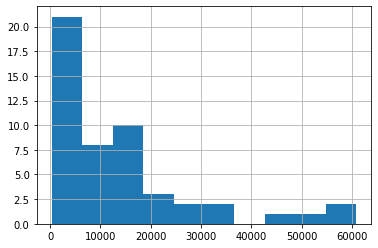

In [93]:
ssa_sums_overview['amount_constant2020_million_USD'].hist()

In [94]:
# make map

countries = alt.topo_feature(data.world_110m.url, "countries")

projection_type="naturalEarth1"
scale_value=240
center_values=[25,10]

base = alt.Chart(countries).mark_geoshape(
    fill='#D8DDE2',
    stroke='white'
).properties(
    width=400,
    height=400,
).project(
    type=projection_type,
    center=center_values,
    scale=scale_value
)

visualized_parameter = 'amount_constant2020_million_USD'
visualized_parameter_classed=visualized_parameter+':Q'
scale_range = ['#00A5FF','#007ACD','#004887','#002D5A']

chart_alldonors_ssa = alt.Chart(countries).mark_geoshape().encode(
    alt.Color(visualized_parameter_classed,type ='quantitative', scale=alt.Scale(domain=[10000,20000,40000],range=scale_range,type='threshold')),
    tooltip=["recipient:N", visualized_parameter_classed]
).transform_lookup(
    lookup="id",
    from_=alt.LookupData(ssa_sums_overview,'numericISO',['recipient', visualized_parameter])
).project(
    type=projection_type,
    center=center_values,
    scale=scale_value
).properties(
    width=400,
    height=400,
    title='ODA by all donors to SSA countries'
)

donations_all_donors = base + chart_alldonors_ssa
donations_all_donors

alt.LayerChart(...)

## Who are the biggest donors to OVERALL?

In [95]:
donor_overview_sums = merged_sums_regionalized.groupby(by='donor')['amount_constant2020_million_USD'].sum().reset_index()

In [96]:
donor_overview_sums.sort_values(by='amount_constant2020_million_USD', ascending = False).head(11)

,donor,amount_constant2020_million_USD
78,United States,265422.666
76,United Kingdom,190496.048
79,"World Bank Group, Total",162206.861
23,EU Institutions,137058.120
27,France,100873.733
28,Germany,85414.827
43,Japan,65110.842
71,Switzerland,54490.953
74,Turkey,51366.027
42,Italy,51075.758


In [97]:
top10DonorCountries_overall = ['China', 'United States', 'EU Institutions', 'Germany', 'United Kingdom', 'Turkey', 'Japan', 'France','Unted Arab Emirates','Canada', 'Australia']

## Who are the biggest donors to SSA COUNTRIES?

In [98]:
donor_overview_sums_ssa = merged_sums_regionalized[merged_sums_regionalized['region']=='Sub-Saharan Africa'].groupby(by='donor')['amount_constant2020_million_USD'].sum().reset_index()

In [99]:
donor_overview_sums_ssa.sort_values(by='amount_constant2020_million_USD', ascending = False).head(15)

,donor,amount_constant2020_million_USD
78,United States,117428.827
79,"World Bank Group, Total",104296.487
76,United Kingdom,64345.198
23,EU Institutions,43648.854
27,France,41681.540
71,Switzerland,26626.520
26,Finland,26027.833
28,Germany,22316.312
31,Global Fund,22118.341
1,"African Development Bank, Total",21540.190


In [100]:
ssa_donor_sum = donor_overview_sums_ssa['amount_constant2020_million_USD'].sum()
ssa_donor_sum

701148.9130294974

In [101]:
ssa_donors_charting = donor_overview_sums_ssa.sort_values(by='amount_constant2020_million_USD', ascending = False).head(15)

alt.Chart(ssa_donors_charting).mark_bar().encode(
    alt.Y('donor', sort='-x'),
    alt.X('amount_constant2020_million_USD')
)

alt.Chart(...)

In [102]:
ssa_donors_charting['donor_share_%_rounded'] = [round(value/ssa_donor_sum*100) for value in ssa_donors_charting['amount_constant2020_million_USD'] ]

In [103]:
ssa_donors_charting

,donor,amount_constant2020_million_USD,donor_share_%_rounded
78,United States,117428.827,17
79,"World Bank Group, Total",104296.487,15
76,United Kingdom,64345.198,9
23,EU Institutions,43648.854,6
27,France,41681.540,6
71,Switzerland,26626.520,4
26,Finland,26027.833,4
28,Germany,22316.312,3
31,Global Fund,22118.341,3
1,"African Development Bank, Total",21540.190,3


In [104]:
topDonorCountries_ssa=ssa_donors_charting['donor'].to_list()

## For the TOP SSA donors, to which countries does their money go?

In [105]:
ssa_sums.head()

,amount_constant2020_million_USD,donor,recipient,continent,region,subregion,country,numericISO,ISO3code,ISO2code,otherGroups
240,0.000,China,Angola,Africa,Sub-Saharan Africa,Middle Africa,Angola,24.000,AGO,AO,LDC
241,0,Adaptation Fund,Angola,Africa,Sub-Saharan Africa,Middle Africa,Angola,24.000,AGO,AO,LDC
242,74.641,"African Development Bank, Total",Angola,Africa,Sub-Saharan Africa,Middle Africa,Angola,24.000,AGO,AO,LDC
243,0,Arab Bank for Economic Development in Africa [...,Angola,Africa,Sub-Saharan Africa,Middle Africa,Angola,24.000,AGO,AO,LDC
244,0,Arab Fund (AFESD),Angola,Africa,Sub-Saharan Africa,Middle Africa,Angola,24.000,AGO,AO,LDC


In [106]:
selection_top_ssa_donors = pd.DataFrame()

for donor in topDonorCountries_ssa:
    ssa_temp = ssa_sums[ssa_sums['donor']==donor]
    selection_top_ssa_donors = pd.concat([selection_top_ssa_donors, ssa_temp])

In [107]:
selection_top_ssa_donors

,amount_constant2020_million_USD,donor,recipient,continent,region,subregion,country,numericISO,ISO3code,ISO2code,otherGroups
318,1391.702,United States,Angola,Africa,Sub-Saharan Africa,Middle Africa,Angola,24.000,AGO,AO,LDC
478,810.348,United States,Botswana,Africa,Sub-Saharan Africa,Southern Africa,Botswana,72.000,BWA,BW,LLDC
558,1614.877,United States,Burundi,Africa,Sub-Saharan Africa,Eastern Africa,Burundi,108.000,BDI,BI,LDC LLDC
638,258.081,United States,Cabo Verde,Africa,Sub-Saharan Africa,Western Africa,Cabo Verde,132.000,CPV,CV,SIDS
798,1055.476,United States,Cameroon,Africa,Sub-Saharan Africa,Middle Africa,Cameroon,120.000,CMR,CM,NaN
...,...,...,...,...,...,...,...,...,...,...,...
10693,38.596,Sweden,Cote d'Ivoire,Africa,Sub-Saharan Africa,Western Africa,Cote d'Ivoire,384.000,CIV,CI,NaN
11088,5.844,Sweden,Eswatini,Africa,Sub-Saharan Africa,Southern Africa,Eswatini,748.000,SWZ,SZ,LLDC
12115,0,Sweden,Mayotte,Africa,Sub-Saharan Africa,Eastern Africa,Mayotte,175.000,MYT,YT,NaN
12826,0,Sweden,Saint Helena,Africa,Sub-Saharan Africa,Western Africa,Saint Helena,654.000,SHN,SH,NaN


In [108]:
overview_selection_top_ssa_donors = selection_top_ssa_donors.groupby(by=['recipient','numericISO'])['amount_constant2020_million_USD'].sum().sort_values(ascending = False).reset_index()
overview_selection_top_ssa_donors.head(10)

,recipient,numericISO,amount_constant2020_million_USD
0,Ethiopia,231.000,49958.579
1,Nigeria,566.000,48689.719
2,Democratic Republic of the Congo,180.000,44125.437
3,Tanzania,834.000,35401.694
4,Kenya,404.000,30221.768
5,Mozambique,508.000,24870.572
6,Uganda,800.000,23805.912
7,Ghana,288.000,19067.693
8,South Africa,710.000,16601.974
9,Zambia,894.000,16251.607


In [110]:
merged_sums_regionalized.head()

,amount_constant2020_million_USD,donor,recipient,continent,region,subregion,country,numericISO,ISO3code,ISO2code,otherGroups
0,0.000,China,Afghanistan,Asia,Southern Asia,Southern Asia,Afghanistan,4.000,AFG,AF,LDC LLDC
1,0,Adaptation Fund,Afghanistan,Asia,Southern Asia,Southern Asia,Afghanistan,4.000,AFG,AF,LDC LLDC
2,0,"African Development Bank, Total",Afghanistan,Asia,Southern Asia,Southern Asia,Afghanistan,4.000,AFG,AF,LDC LLDC
3,0,Arab Bank for Economic Development in Africa [...,Afghanistan,Asia,Southern Asia,Southern Asia,Afghanistan,4.000,AFG,AF,LDC LLDC
4,0,Arab Fund (AFESD),Afghanistan,Asia,Southern Asia,Southern Asia,Afghanistan,4.000,AFG,AF,LDC LLDC


In [111]:
def donor_profile_map_ssa(donor_country):
    
    donor_df = ssa_sums[ssa_sums['donor']==donor_country]
    
    donor_donations_to_ssa = donor_df['amount_constant2020_million_USD'].sum()
    
    donor_donations_total = merged_sums_regionalized[merged_sums_regionalized['donor']==donor_country]['amount_constant2020_million_USD'].sum()
    
    donor_share_to_SSA = round(donor_donations_to_ssa/donor_donations_total*100)
    
    countries = alt.topo_feature(data.world_110m.url, "countries")

    projection_type="naturalEarth1"
    scale_value=240
    center_values=[25,10]

    base = alt.Chart(countries).mark_geoshape(
        fill='#D8DDE2',
        stroke='white'
    ).properties(
        width=400,
        height=400,
    ).project(
        type=projection_type,
        center=center_values,
        scale=scale_value
    )

    #variable_list = ['unaffordable', 'expensive', 'costly', 'affordable']
    visualized_parameter_n = 'amount_constant2020_million_USD'
    visualized_parameter_classed_n=visualized_parameter_n+':Q'

    chart = alt.Chart(countries).mark_geoshape().encode(
        alt.Color(visualized_parameter_classed_n, scale=alt.Scale(range=['#00A5FF','#002D5A'])),
        tooltip=["recipient:N", visualized_parameter_classed_n]
    ).transform_lookup(
        lookup="id",
        from_=alt.LookupData(donor_df,'numericISO',['recipient', visualized_parameter_n])
    ).project(
        type=projection_type,
        center=center_values,
        scale=scale_value
    ).properties(
        width=400,
        height=400,
        title=donor_country +': ' + str(donor_share_to_SSA) +'% of ODA went to SSA countries'
    )

    donormap = base + chart
    
    return donormap

In [112]:
for donor in topDonorCountries_ssa:
    donor_profile_map = donor_profile_map_ssa(donor)
    donor_profile_map.display()

alt.LayerChart(...)

alt.LayerChart(...)

alt.LayerChart(...)

alt.LayerChart(...)

alt.LayerChart(...)

alt.LayerChart(...)

alt.LayerChart(...)

alt.LayerChart(...)

alt.LayerChart(...)

alt.LayerChart(...)

alt.LayerChart(...)

alt.LayerChart(...)

alt.LayerChart(...)

alt.LayerChart(...)

alt.LayerChart(...)

In [113]:
donor_profile_map_ssa('Turkey')

alt.LayerChart(...)

In [114]:
donor_profile_map_ssa('Qatar')

alt.LayerChart(...)

In [115]:
donor_profile_map_ssa('Kuwait')

alt.LayerChart(...)

### biggest donors by country

In [116]:
ssa_sums.head()

,amount_constant2020_million_USD,donor,recipient,continent,region,subregion,country,numericISO,ISO3code,ISO2code,otherGroups
240,0.000,China,Angola,Africa,Sub-Saharan Africa,Middle Africa,Angola,24.000,AGO,AO,LDC
241,0,Adaptation Fund,Angola,Africa,Sub-Saharan Africa,Middle Africa,Angola,24.000,AGO,AO,LDC
242,74.641,"African Development Bank, Total",Angola,Africa,Sub-Saharan Africa,Middle Africa,Angola,24.000,AGO,AO,LDC
243,0,Arab Bank for Economic Development in Africa [...,Angola,Africa,Sub-Saharan Africa,Middle Africa,Angola,24.000,AGO,AO,LDC
244,0,Arab Fund (AFESD),Angola,Africa,Sub-Saharan Africa,Middle Africa,Angola,24.000,AGO,AO,LDC


In [117]:
ssa_sums_reduced = ssa_sums[['amount_constant2020_million_USD', 'donor','recipient']]

In [118]:
ssa_recipients = ssa_sums_reduced['recipient'].unique()

In [119]:
ssa_recipients

array(['Angola', 'Botswana', 'Burundi', 'Cabo Verde', 'Cameroon',
       'Central African Republic', 'Comoros', 'Congo',
       'Democratic Republic of the Congo', 'Equatorial Guinea', 'Eritrea',
       'Ethiopia', 'Gabon', 'Ghana', 'Guinea', 'Guinea-Bissau',
       'Madagascar', 'Mali', 'Mauritius', 'Mozambique', 'Rwanda',
       'Sierra Leone', 'South Africa', 'Tanzania', 'Togo', 'Uganda',
       'Zambia', 'Zimbabwe', 'Benin', 'Djibouti', 'Kenya', 'Lesotho',
       'Namibia', 'Niger', 'Nigeria', 'Mauritania', 'Liberia', 'Somalia',
       'Senegal', 'Chad', 'Malawi', 'South Sudan', 'Gambia',
       'Sao Tome and Principe', 'Burkina Faso', "Cote d'Ivoire",
       'Eswatini', 'Mayotte', 'Saint Helena', 'Seychelles'], dtype=object)

In [120]:
def recipient_profiles(recipient_country):
    
    recipient_df = ssa_sums_reduced[ssa_sums_reduced['recipient']==recipient_country]
    
    all_donations_to_recipient = recipient_df['amount_constant2020_million_USD'].sum()
    
    recipient_df['share_by_donor'] = [value/all_donations_to_recipient for value in recipient_df['amount_constant2020_million_USD']]
    
    recipient_df_top_donors = recipient_df.sort_values('share_by_donor', ascending = False).head(7)
    
    sum_top = recipient_df_top_donors['amount_constant2020_million_USD'].sum()
    
    sum_others = all_donations_to_recipient - sum_top
    
    share_others = sum_others / all_donations_to_recipient
    
    others = [{'donor': 'others', 'amount_constant2020_million_USD':sum_others,'share_by_donor':share_others}]
    
    others_df = pd.DataFrame(others)
    
    recipient_df_topDonors = pd.concat([recipient_df_top_donors,others_df])
    
    recipient_profile = alt.Chart(recipient_df_topDonors).mark_bar(width=200).encode(
        alt.Y('share_by_donor',sort='-y'),
        alt.Color('donor')
    ).properties(
        width=400,
        height=400,
        title=recipient_country +': ' + str(round(all_donations_to_recipient)) +' million constant 2020 USD in ODA'
    )
    
    return recipient_profile
    
    #stacked bar - chart top 5, rest: others

In [121]:
for recipient in ssa_recipients:
    recipient_profile_chart = recipient_profiles(recipient)
    recipient_profile_chart.display()

/var/folders/fk/_qbrt9ys18b6s2yb_kqblv1xt9_xg3/T/ipykernel_13909/861834355.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recipient_df['share_by_donor'] = [value/all_donations_to_recipient for value in recipient_df['amount_constant2020_million_USD']]


alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)